In [11]:
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
#データセット作成
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

PCAによる次元削除

In [7]:
#共分散行列を作成
cov_mat = np.cov(X_train_std.T)
#固有値と固有ベクトルを計算
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.33051429  0.08414846  0.29595018  0.16831254  0.21432212
  0.2399553 ]


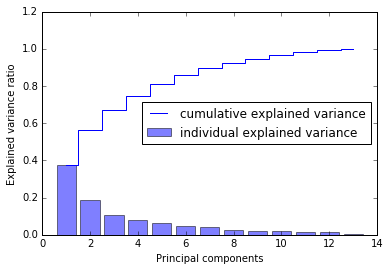

In [13]:
#固有値を合計
tot = sum(eigen_vals)
#分散説明率を計算
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True) ]
#分散説明率の累積和を取得
cum_var_exp = np.cumsum(var_exp)
#分散説明率の棒グラフを作成
plt.bar(range(1,14),var_exp,alpha=0.5,align='center', label='individual explained variance')
#累積和を階段グラフで作成
plt.step(range(1,14),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [14]:
#(固有値　固有ベクトル)のタプルのリストを作成
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [15]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.14669811  0.50417079]
 [ 0.24224554  0.24216889]
 [ 0.02993442  0.28698484]
 [ 0.25519002 -0.06468718]
 [-0.12079772  0.22995385]
 [-0.38934455  0.09363991]
 [-0.42326486  0.01088622]
 [ 0.30634956  0.01870216]
 [-0.30572219  0.03040352]
 [ 0.09869191  0.54527081]
 [-0.30032535 -0.27924322]
 [-0.36821154 -0.174365  ]
 [-0.29259713  0.36315461]]


In [34]:
X_train_std.shape

(124, 13)

In [22]:
eigen_pairs[0][1][:, np.newaxis]

array([[-0.14669811],
       [ 0.24224554],
       [ 0.02993442],
       [ 0.25519002],
       [-0.12079772],
       [-0.38934455],
       [-0.42326486],
       [ 0.30634956],
       [-0.30572219],
       [ 0.09869191],
       [-0.30032535],
       [-0.36821154],
       [-0.29259713]])

In [20]:
eigen_pairs[0][1]

array([-0.14669811,  0.24224554,  0.02993442,  0.25519002, -0.12079772,
       -0.38934455, -0.42326486,  0.30634956, -0.30572219,  0.09869191,
       -0.30032535, -0.36821154, -0.29259713])

In [41]:
a = np.array([[1,1],[1,1],[1,1]])
b = np.array([[3,4],[5,6]])
a

array([[1, 1],
       [1, 1],
       [1, 1]])

In [42]:
b

array([[3, 4],
       [5, 6]])

In [43]:
a.dot(b)

array([[ 8, 10],
       [ 8, 10],
       [ 8, 10]])

In [47]:
X_train_std[0].dot(w)

array([-2.59891628,  0.00484089])

In [48]:
X_train_pca = X_train_std.dot(w)

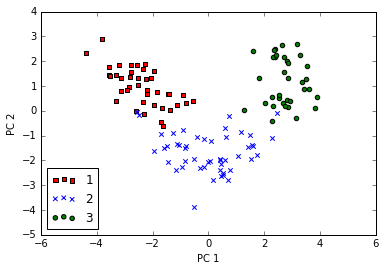

In [50]:
colors = ['r','b','g']
markers = ['s','x','o']

#クラスラベル、点の色、点の種類の組み合わせからなるリストを生成してプロット
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,label=l,marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [51]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

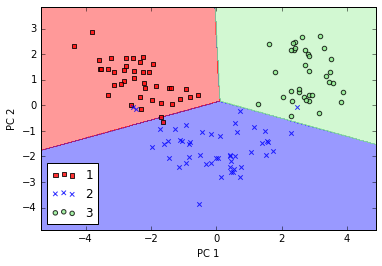

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
#主成分数を指定して、PCAのインスタンスを生成
pca = PCA(n_components=2)
#トレーニングデータやテストデータをPCAに適合
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

#決定境界をプロット
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

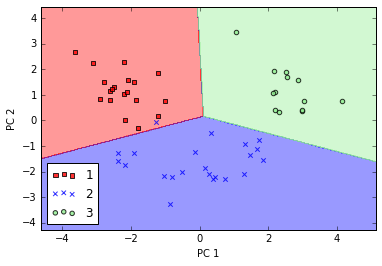

In [53]:
#決定境界をプロット
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [54]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
#分散説明率を計算
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

線形判別分析LDAによる教師ありデータ圧縮

データが正規分布に従い、互いに独立であるのが望ましい

In [57]:
np.set_printoptions(precision=4)
mean_vecs = []
#meanのaxis=0は縦方向に計算
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [58]:
d = 13
#S_Wはクラス内変動行列
S_W = np.zeros((d,d))
#クラスラベルごとに計算
for label, mv in zip(range(1,4), mean_vecs) :
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        #トレーニングデータと平均ベクトルを(d,1)の形に変換
        row, mv = row.reshape(d, 1), mv.reshape(d,1)
        #d行1列と1行d列の内積はd行d列になる事に注意
        class_scatter += (row-mv).dot((row-mv).T)
        
    S_W += class_scatter
    
print('Within-class scatter matrix: %sx%s' %(S_W.shape[0], S_W.shape[1]))        

Within-class scatter matrix: 13x13


しかしこれだとトレーニングデータセットのクラスラベルに偏りがあるとclass_scatterに加える回数が不均等になってしまう
すなわちクラスラベルが一様に分布、データセット内で同じ数なければならない

In [61]:
#0の数を数えているため[1:]をつけた
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


クラスラベルが一様に分布していないためスケーリングする

In [67]:
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4),mean_vecs):
    #np.covはデフォルトではbias=0で不偏共分散行列になっている事に注意
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
    
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [70]:
c = np.array({1,2})
c

array({1, 2}, dtype=object)

In [74]:
np.cov(a)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [76]:
a

array([[1, 1],
       [1, 1],
       [1, 1]])

In [79]:
d = np.array([1,3,2,4,5,6]).reshape(3,2)
d

array([[1, 3],
       [2, 4],
       [5, 6]])

In [89]:
np.cov(d,bias=0)

array([[ 2. ,  2. ,  1. ],
       [ 2. ,  2. ,  1. ],
       [ 1. ,  1. ,  0.5]])

In [82]:
e = np.array([1,2,3,4]).reshape(2,2)
e

array([[1, 2],
       [3, 4]])

In [83]:
np.cov(e)

array([[ 0.5,  0.5],
       [ 0.5,  0.5]])

In [85]:
f = np.array([40,80,90,80,90,100]).reshape(2,3)
f

array([[ 40,  80,  90],
       [ 80,  90, 100]])

In [86]:
np.cov(f)

array([[ 700.,  250.],
       [ 250.,  100.]])

In [91]:
###クラス間変動行列を求める
#列方向(特徴量ごと)のサンプル全体の平均を求める
mean_overall = np.mean(X_train_std,axis=0)
d = 13 #特徴量の個数
S_B = np.zeros((d,d))
#mean_vecsは各ラベルごとの特徴量の平均
for i, mean_vec in enumerate(mean_vecs):
    #nはクラスラベルの個数
    n = X_train[y_train==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B += n* (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
    
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))      

Between-class scatter matrix: 13x13


In [90]:
for i, x in enumerate(['A','B','C']):
    print(i,x)

0 A
1 B
2 C


あとは行列S_W^-1 S_B を固有値分解して次元圧縮

In [92]:
#inv関数で逆行列、dotで行列積、eig関数で固有値を計算
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [123]:
len(eigen_vals)

13

In [102]:
#固有値が大きいものから並び替え
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

452.721581245
156.43636122
8.11327596465e-14
2.78687384543e-14
2.78687384543e-14
2.27622032758e-14
2.27622032758e-14
1.97162599817e-14
1.32484714652e-14
1.32484714652e-14
1.03791501611e-14
5.94140664834e-15
2.12636975748e-16


In [103]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0],reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

452.721581245
156.43636122
8.11327596465e-14
2.78687384543e-14
2.78687384543e-14
2.27622032758e-14
2.27622032758e-14
1.97162599817e-14
1.32484714652e-14
1.32484714652e-14
1.03791501611e-14
5.94140664834e-15
2.12636975748e-16


In [105]:
eigen_pairs[0][0]

452.72158124497452

In [107]:
func = lambda k: k[0]

In [108]:
func(eigen_pairs)

(452.72158124497452,
 array([ 0.0662+0.j, -0.0386+0.j,  0.0217+0.j, -0.1840+0.j,  0.0034+0.j,
        -0.2326+0.j,  0.7747+0.j,  0.0811+0.j, -0.0875+0.j, -0.1850+0.j,
         0.0660+0.j,  0.3805+0.j,  0.3285+0.j]))

固有値を減らしていくとクラスの判別性がどう変わっていくか

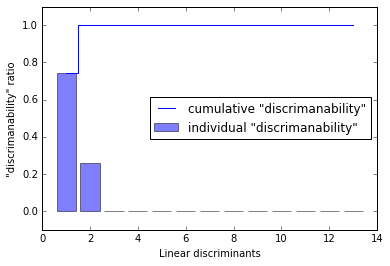

In [109]:
#固有値の実数部の総和を求める
tot = sum(eigen_vals.real)
#分散説明率とその累積和を計算
discr = [(i / tot) for i in sorted(eigen_vals.real,reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14),discr,alpha=0.5,align='center',label='individual "discrimanability"')
#累積和を階段グラフで作成
plt.step(range(1,14),cum_discr,where='mid',label='cumulative "discrimanability"')
plt.ylabel('"discrimanability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.show()

In [111]:
#変動行列Wを作成
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.0662 -0.3797]
 [-0.0386 -0.2206]
 [ 0.0217 -0.3816]
 [-0.184   0.3018]
 [ 0.0034  0.0141]
 [-0.2326  0.0234]
 [ 0.7747  0.1869]
 [ 0.0811  0.0696]
 [-0.0875  0.1796]
 [-0.185  -0.284 ]
 [ 0.066   0.2349]
 [ 0.3805  0.073 ]
 [ 0.3285 -0.5971]]


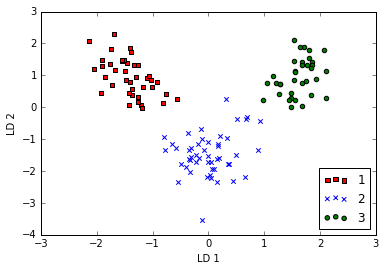

In [114]:
#新しい特徴空間に射影
X_train_lda = X_train_std.dot(w)
colors = ['r','b','g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l,0]*(-1),X_train_lda[y_train==l,1]*(-1),c=c, label=l, marker=m)
    
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

scikit-learn によるLDA

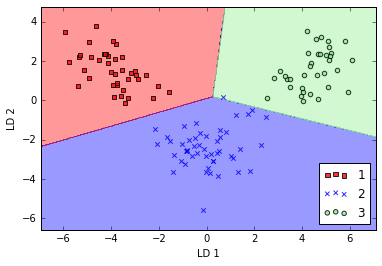

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y_train)
X_test_lda = lda.transform(X_test_std)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda,y_train,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

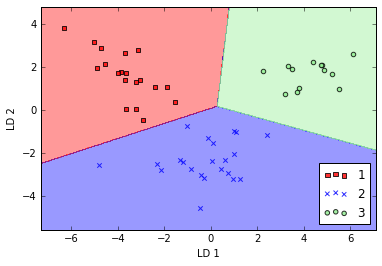

In [117]:
plot_decision_regions(X_test_lda,y_test,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

In [118]:
#トレーニングデータに対する正解率を表示
print('Training accuracy:', lr.score(X_train_lda,y_train))
#テストデータに対する正解率を表示
print('Test accuracy:', lr.score(X_test_lda,y_test))

Training accuracy: 0.991935483871
Test accuracy: 1.0


カーネル主成分分析を使った非線形写像

In [119]:
a

array([[1, 1],
       [1, 1],
       [1, 1]])

In [120]:
p = np.array([1,2,3]).reshape(3,1)
p

array([[1],
       [2],
       [3]])

In [121]:
q = np.array([4,5,6]).reshape(3,1)
q

array([[4],
       [5],
       [6]])

カーネル主成分分析を実装

In [146]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, ganma, n_components):
    """RBFカーネルPCAの実装
    パラメータ
    ----------------------------------------
    X: {Numpy ndarray}, shape = [n_samples, n_features]
    
    ganma: float
            RBFカーネルのチューニングパラメータ
            
    n_components: int
            返される主成分の個数
            
            
    戻り値
    ------------------------------------------
    X_pc: {Numpy ndarray}, shape = [n_samples, k_features]
            射影されたデータセット
            
    """
    #M×N次元のデータセットで全ての行のペアごとの平方ユークリッド距離を計算
    #平方である事に注意
    sq_dists = pdist(X, 'sqeuclidean')
    
    #ペアごとの距離を正方行列に変換
    #その行と他の行との距離の行列(そのため必ず対角成分は0)
    mat_sq_dists = squareform(sq_dists)
    
    #対称カーネル行列を計算
    K = exp(-ganma*mat_sq_dists)
    
    #カーネル行列を中心化
    #K.shape[0]はサンプル数
    N = K.shape[0]
    
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #中心化されたカーネル行列から固有対を取得
    #?numpy.eighはそれらをソート順に返す
    eigvals, eigvecs = eigh(K)
    
    #上位k個の固有ベクトル(射影されたサンプル)を収集
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components+1)))
    
    
    return X_pc  

In [140]:
g = np.array([1,2,3,4,5,6,7,8]).reshape(4,2)
g

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [145]:
squareform(pdist(g, 'sqeuclidean'))

array([[  0.,   8.,  32.,  72.],
       [  8.,   0.,   8.,  32.],
       [ 32.,   8.,   0.,   8.],
       [ 72.,  32.,   8.,   0.]])

In [164]:
np.bincount(y)

array([50, 50])

In [176]:
(y == 1).sum()

50

In [195]:
lis = []
for x in np.unique(y):
    lis.append(tuple((x,(y == x).sum())))
    
    
    
print(lis)

[(0, 50), (1, 50)]


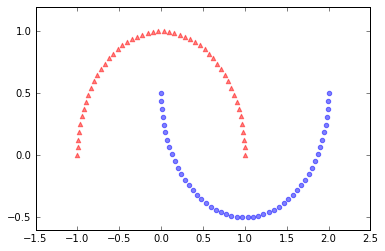

In [196]:
#2つの半月型データを作成してプロット
from sklearn.datasets import make_moons
X, y= make_moons(n_samples=100, random_state=123) 
plt.scatter(X[y==0,0],X[y==0,1], color='r',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1], color='b',marker='o',alpha=0.5)
plt.show()

まず標準のPCAでやってみる

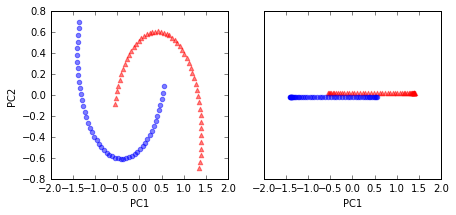

In [200]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
#一番目のグラフ領域に散布図をプロット
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1], color='r',marker='^',alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1], color='b',marker='o',alpha=0.5)

#二番目のグラフ領域に散布図をプロット(PC1でどれくらい線形分離できているかを見る)
ax[1].scatter(X_spca[y==0,0],np.zeros((50,1))+0.02, color='r',marker='^',alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((50,1))-0.02,color='b',marker='o',alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [228]:
ganma=15
n_components=2
#M×N次元のデータセットで全ての行のペアごとの平方ユークリッド距離を計算
    #平方である事に注意
sq_dists = pdist(X, 'sqeuclidean')
    
    #ペアごとの距離を正方行列に変換
    #その行と他の行との距離の行列(そのため必ず対角成分は0)
mat_sq_dists = squareform(sq_dists)
    
    #対称カーネル行列を計算
K = exp(-ganma*mat_sq_dists)
    
    #カーネル行列を中心化
    #K.shape[0]はサンプル数
N = K.shape[0]
    
one_n = np.ones((N,N))/N
K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #中心化されたカーネル行列から固有対を取得
    #?numpy.eighはそれらをソート順に返す
eigvals, eigvecs = eigh(K)
    
    #上位k個の固有ベクトル(射影されたサンプル)を収集
X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components+1)))
    

In [205]:
X_pc.shape

(100, 2)

In [207]:
eigvecs.shape

(100, 100)

In [211]:
eigvecs[:,-2:].shape

(100, 2)

In [230]:
eigvals.shape

(100,)

In [231]:
eigvecs.shape

(100, 100)

In [218]:
((a[:,0],a[:,1]))

(array([1, 1, 1]), array([1, 1, 1]))

In [232]:
x = np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [236]:
sig =(x.T.dot(x))/3 #　φ(X)の共分散行列
sig

array([[ 22.,  26.,  30.],
       [ 26.,  31.,  36.],
       [ 30.,  36.,  42.]])

In [243]:
va, ve = eigh(sig)

In [244]:
ve

array([[ 0.4082,  0.7767, -0.4797],
       [-0.8165,  0.0757, -0.5724],
       [ 0.4082, -0.6253, -0.6651]])

In [245]:
va

array([  4.8046e-15,   3.8047e-01,   9.4620e+01])

In [246]:
#(固有値　固有ベクトル)のタプルのリストを作成
pairs = [(np.abs(va[i]),ve[:, i]) for i in range(len(va))]
pairs.sort(reverse=True)

In [254]:
pairs[0][0]

94.619528860123452

In [255]:
pairs[0][1]

array([-0.4797, -0.5724, -0.6651])

In [256]:
pairs[0][0] * pairs[0][1]

array([-45.3863, -54.1572, -62.9281])

In [257]:
sig.dot(pairs[0][1])

array([-45.3863, -54.1572, -62.9281])

次にカーネルPCA関数を使って見る

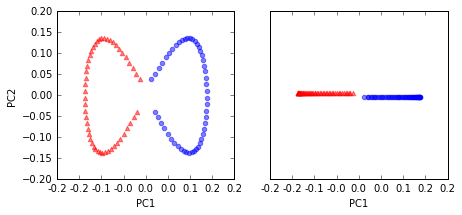

In [229]:
from matplotlib.ticker import FormatStrFormatter
#カーネル関数を実行
X_kpca = rbf_kernel_pca(X, ganma=15,n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
#一番目のグラフ領域に散布図をプロット
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1], color='r',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1], color='b',marker='o',alpha=0.5)

#二番目のグラフ領域に散布図をプロット(PC1でどれくらい線形分離できているかを見る)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02, color='r',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,color='b',marker='o',alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

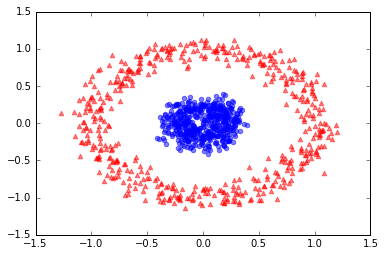

In [258]:
#同心円用
from sklearn.datasets import make_circles
X, y= make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0,0],X[y==0,1], color='r',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1], color='b',marker='o',alpha=0.5)
plt.show()

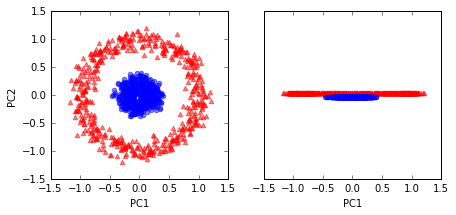

In [260]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
#一番目のグラフ領域に散布図をプロット
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1], color='r',marker='^',alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1], color='b',marker='o',alpha=0.5)

#二番目のグラフ領域に散布図をプロット(PC1でどれくらい線形分離できているかを見る)
ax[1].scatter(X_spca[y==0,0],np.zeros((500,1))+0.02, color='r',marker='^',alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((500,1))-0.02,color='b',marker='o',alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

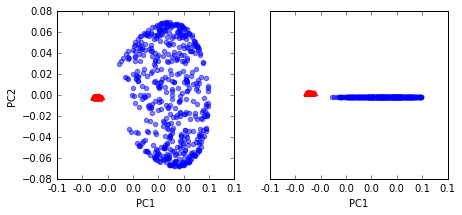

In [261]:
from matplotlib.ticker import FormatStrFormatter
#カーネル関数を実行
X_kpca = rbf_kernel_pca(X, ganma=15,n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
#一番目のグラフ領域に散布図をプロット
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1], color='r',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1], color='b',marker='o',alpha=0.5)

#二番目のグラフ領域に散布図をプロット(PC1でどれくらい線形分離できているかを見る)
ax[1].scatter(X_kpca[y==0,0],np.zeros((500,1))+0.02, color='r',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((500,1))-0.02,color='b',marker='o',alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

In [264]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, ganma, n_components):
    """RBFカーネルPCAの実装
    パラメータ
    ----------------------------------------
    X: {Numpy ndarray}, shape = [n_samples, n_features]
    
    ganma: float
            RBFカーネルのチューニングパラメータ
            
    n_components: int
            返される主成分の個数
            
            
    戻り値
    ------------------------------------------
    alpha: {Numpy ndarray}, shape = [n_samples, k_features]
            射影されたデータセット
            
    lamdas: list
            固有値
            
    """
    #M×N次元のデータセットで全ての行のペアごとの平方ユークリッド距離を計算
    #平方である事に注意
    #MC2通り出てくる
    sq_dists = pdist(X, 'sqeuclidean')
    
    #ペアごとの距離を正方行列に変換
    #その行と他の行との距離の行列(そのため必ず対角成分は0)
    mat_sq_dists = squareform(sq_dists)
    
    #対称カーネル行列を計算
    K = exp(-ganma*mat_sq_dists)
    
    #カーネル行列を中心化
    #K.shape[0]はサンプル数
    N = K.shape[0]
    
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    #中心化されたカーネル行列から固有対を取得
    #?numpy.eighはそれらをソート順に返す
    eigvals, eigvecs = eigh(K)
    
    #上位k個の固有ベクトル(射影されたサンプル)を収集
    alphas = np.column_stack((eigvecs[:, -i] for i in range(1, n_components+1)))
    
    #対応する固有値を収集
    lambdas = [eigvals[-i] for i in range(1,n_components+1) ]
    
    return alphas, lambdas  

In [265]:
X, y= make_moons(n_samples=100,random_state=123)
alphas, lambdas= rbf_kernel_pca(X, ganma=15, n_components=1)

半月データセットの26番目の点を新しいデータ点とすると

In [266]:
x_new = X[25]
x_new

array([ 1.8713,  0.0093])

In [267]:
x_proj = alphas[25] #元の射影
x_proj

array([ 0.0788])

In [272]:
def project_x(x_new,X,alphas=alphas,lambdas=lambdas):
    #各サンプルと新しいデータ点の距離の二乗和の行列を生成
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-ganma*pair_dist)
    return k.dot(alphas/lambdas)

In [271]:
X.shape

(100, 2)

In [273]:
x_reproj = project_x(x_new,X,alphas=alphas,lambdas=lambdas)
x_reproj

array([ 0.0788])

In [274]:
alphas=alphas
lambdas=lambdas
#pair_distには各サンプルと新しいデータ点の距離の二乗の行列が入っている
pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
k = np.exp(-ganma*pair_dist)
k.dot(alphas/lambdas)

array([ 0.0788])

In [276]:
pair_dist.shape

(100,)

In [279]:
np.sum((x_new-X[1])**2)

1.5549581320873709

In [280]:
(x_new-X[1])**2

array([ 1.336,  0.219])

In [281]:
k.shape

(100,)

In [282]:
alphas.shape

(100, 1)

In [284]:
K.shape

(100, 100)

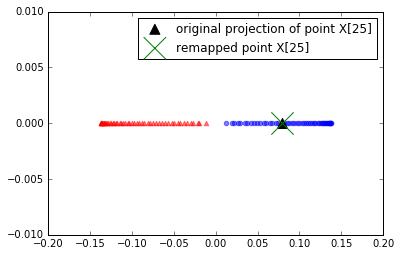

In [286]:
plt.scatter(alphas[y==0,0],np.zeros((50)), color='r',marker='^',alpha=0.5)
plt.scatter(alphas[y==1,0],np.zeros((50)),color='b',marker='o',alpha=0.5)

plt.scatter(x_proj,0,color='black',label='original projection of point X[25]', marker='^',s=100)
plt.scatter(x_reproj,0,color='green',label='remapped point X[25]', marker='x',s=500)
plt.legend(scatterpoints=1)
plt.show()

 scikit-learnでカーネル主成分分析を実装

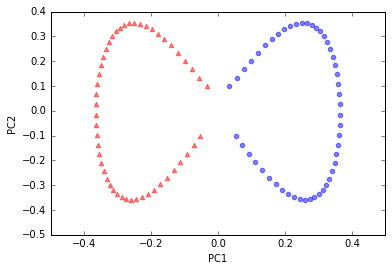

In [291]:
from sklearn.decomposition import KernelPCA
X, y= make_moons(n_samples=100,random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf',gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y==0,0],X_skernpca[y==0,1], color='r',marker='^',alpha=0.5)
plt.scatter(X_skernpca[y==1,0],X_skernpca[y==1,1], color='b',marker='o',alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [1]:
from sklearn.decomposition import PCA
pca = PCA()
pca.get_params()

{'copy': True, 'n_components': None, 'whiten': False}

In [8]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
X = np.arange(8).reshape(4,2)
pdist(X, 'sqeuclidean')

array([  8.,  32.,  72.,   8.,  32.,   8.])

In [9]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [10]:
squareform(pdist(X, 'sqeuclidean'))

array([[  0.,   8.,  32.,  72.],
       [  8.,   0.,   8.,  32.],
       [ 32.,   8.,   0.,   8.],
       [ 72.,  32.,   8.,   0.]])

In [24]:
from sklearn.cross_validation import StratifiedKFold
kfold = StratifiedKFold(y_train.flatten(), n_folds=10)

In [26]:
for k in kfold:
    print(k)

(array([  9,  12,  13,  15,  16,  17,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 14, 18]))
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  14,  18,
        21,  24,  25,  26,  27,  28,  30,  31,  32,  33,  34,  35,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  6

In [21]:
y_train

array([1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3,
       3, 2, 2, 2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 2,
       1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1,
       1, 1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 1, 3, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 3])

In [27]:
np.linspace(0.1,1.0,10)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])